In [29]:
import numpy as np
import pickle
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib.lines import Line2D

In [30]:
Typ = ["simple","simple_I0","meta"][2]
siz = ["10","100","1000"][:]

In [31]:
#get pickle
plot_dict = {}
for i in siz:
    with open(f"../../Data/R0_3/Sims_SIR/Pickles/Sim_dict_{Typ}_{i}.pickle", 'rb') as handle:
        out_dict = pickle.load(handle)
    plot_dict[f"Size_{i}"] = out_dict
    print(f" The Proportions of extinctions for N={i}:{sum(out_dict['Extinction'])/1000}")

 The Proportions of extinctions for N=10:0.182
 The Proportions of extinctions for N=100:0.197
 The Proportions of extinctions for N=1000:0.181


In [32]:
if Typ != "meta":
    fig,ax0 = plt.subplots(figsize = (10,10), nrows = 2, ncols = 2)
    ax0 = ax0.flatten()
    for i in siz:
        sns.histplot(np.array(plot_dict[f"Size_{i}"]["Final_size"])[np.array(plot_dict[f"Size_{i}"]["Extinction"]) == 0]/int(i), ax=ax0[0],binwidth = 0.02)
        sns.histplot(np.array(plot_dict[f"Size_{i}"]["Tmax"])[np.array(plot_dict[f"Size_{i}"]["Extinction"]) == 0], ax=ax0[1],binwidth = 0.5)
        sns.histplot(np.array(plot_dict[f"Size_{i}"]["Peak"])[np.array(plot_dict[f"Size_{i}"]["Extinction"]) == 0]/int(i), ax=ax0[2],binwidth = 0.02)
        sns.histplot(np.array(plot_dict[f"Size_{i}"]["Tpeak"])[np.array(plot_dict[f"Size_{i}"]["Extinction"]) == 0], ax=ax0[3],binwidth = 0.2)
    ax0[0].set_xlabel("Final Size Proportions")
    ax0[1].set_xlabel("Time of final event")
    ax0[2].set_xlabel("Peak Infection Proportions")
    ax0[3].set_xlabel("Time @ peak infections")
    legend_elements = [Line2D([0], [0], color='g', lw=4, label='N=1000'),
                   Line2D([0], [0], color='orange',lw=4, label='N=100'),
                       Line2D([0], [0], color='deepskyblue', lw=4, label='N=10')]
    fig.legend(handles=legend_elements, bbox_to_anchor = (1,1))
    fig.tight_layout()
    fig.show()

C:\Users\ollie\AppData\Local\Temp\ipykernel_13512\514456970.py:11: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


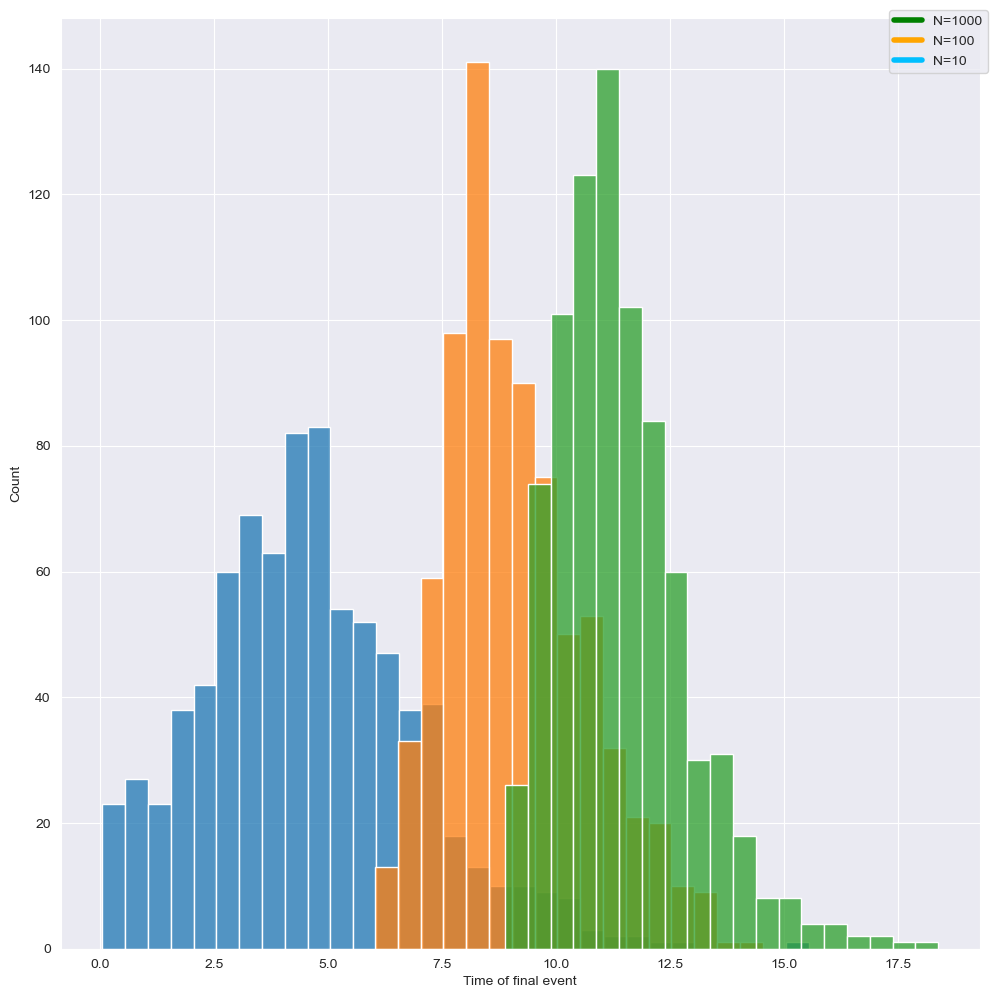

In [41]:
if Typ == "meta":
    fig,ax0 = plt.subplots(figsize = (10,10))
    for i in siz:
        sns.histplot(np.array(plot_dict[f"Size_{i}"]["Tmax"])[np.array(plot_dict[f"Size_{i}"]["Extinction"]) == 0], ax=ax0,binwidth = 0.5)
    ax0.set_xlabel("Time of final event")
    legend_elements = [Line2D([0], [0], color='g', lw=4, label='N=1000'),
                   Line2D([0], [0], color='orange',lw=4, label='N=100'),
                       Line2D([0], [0], color='deepskyblue', lw=4, label='N=10')]
    fig.legend(handles=legend_elements, bbox_to_anchor = (1,1))
    fig.tight_layout()
    fig.show()

In [34]:
print(np.array(plot_dict[f"Size_{10}"]["Final_size"][f"Node{1}"]))

[10 10 10 10 10  1 10  9  1  4  7 10  5  9 10  7  9 10 10 10  1 10 10  3
 10  1  1 10 10  9 10  1  1 10 10 10 10  1 10 10  4  1  2  1 10  3 10 10
  1 10 10  8 10 10 10 10  1 10 10  1  1 10 10  6  1 10 10 10 10  1  4  9
 10 10 10  7 10 10 10  4  1  7 10 10  1  1 10 10 10 10 10  9 10  1 10 10
  1  8  9 10 10 10  9  9 10 10 10  1 10 10 10  6  1  1  9 10 10  1 10 10
 10 10 10 10 10 10 10  7  7 10 10  7 10  2 10  1 10  1  2 10 10  9 10 10
  1  1  2 10  9  1 10  2 10  1 10 10 10  1 10 10 10  2 10  1 10 10  2  1
  1  3 10  1  1 10  7 10 10 10  1 10 10  1  2  2 10  1 10 10  1 10 10 10
 10  1 10  1 10  1 10  1 10  2  9 10 10 10 10  1 10  1  8 10  3 10  1 10
 10  6  1  8  6 10 10 10 10  9  1  2  1 10 10  9  2 10  5 10 10 10  3  1
  9 10 10 10  4  9 10 10 10 10 10  1  8 10  5 10  8  1 10 10 10  7 10 10
  1 10 10 10  3 10  7  1 10 10 10  5  9  3 10 10 10  1  7 10  1 10  9  1
 10  9  1 10 10 10 10 10 10 10 10  1 10  1  1 10  4  8 10  9  4 10 10  1
 10 10  1 10  4  8  9 10 10 10 10 10 10 10  1  9  1

C:\Users\ollie\AppData\Local\Temp\ipykernel_13512\1184524793.py:16: UserWarning: The figure layout has changed to tight
  fig.tight_layout()
C:\Users\ollie\AppData\Local\Temp\ipykernel_13512\1184524793.py:17: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


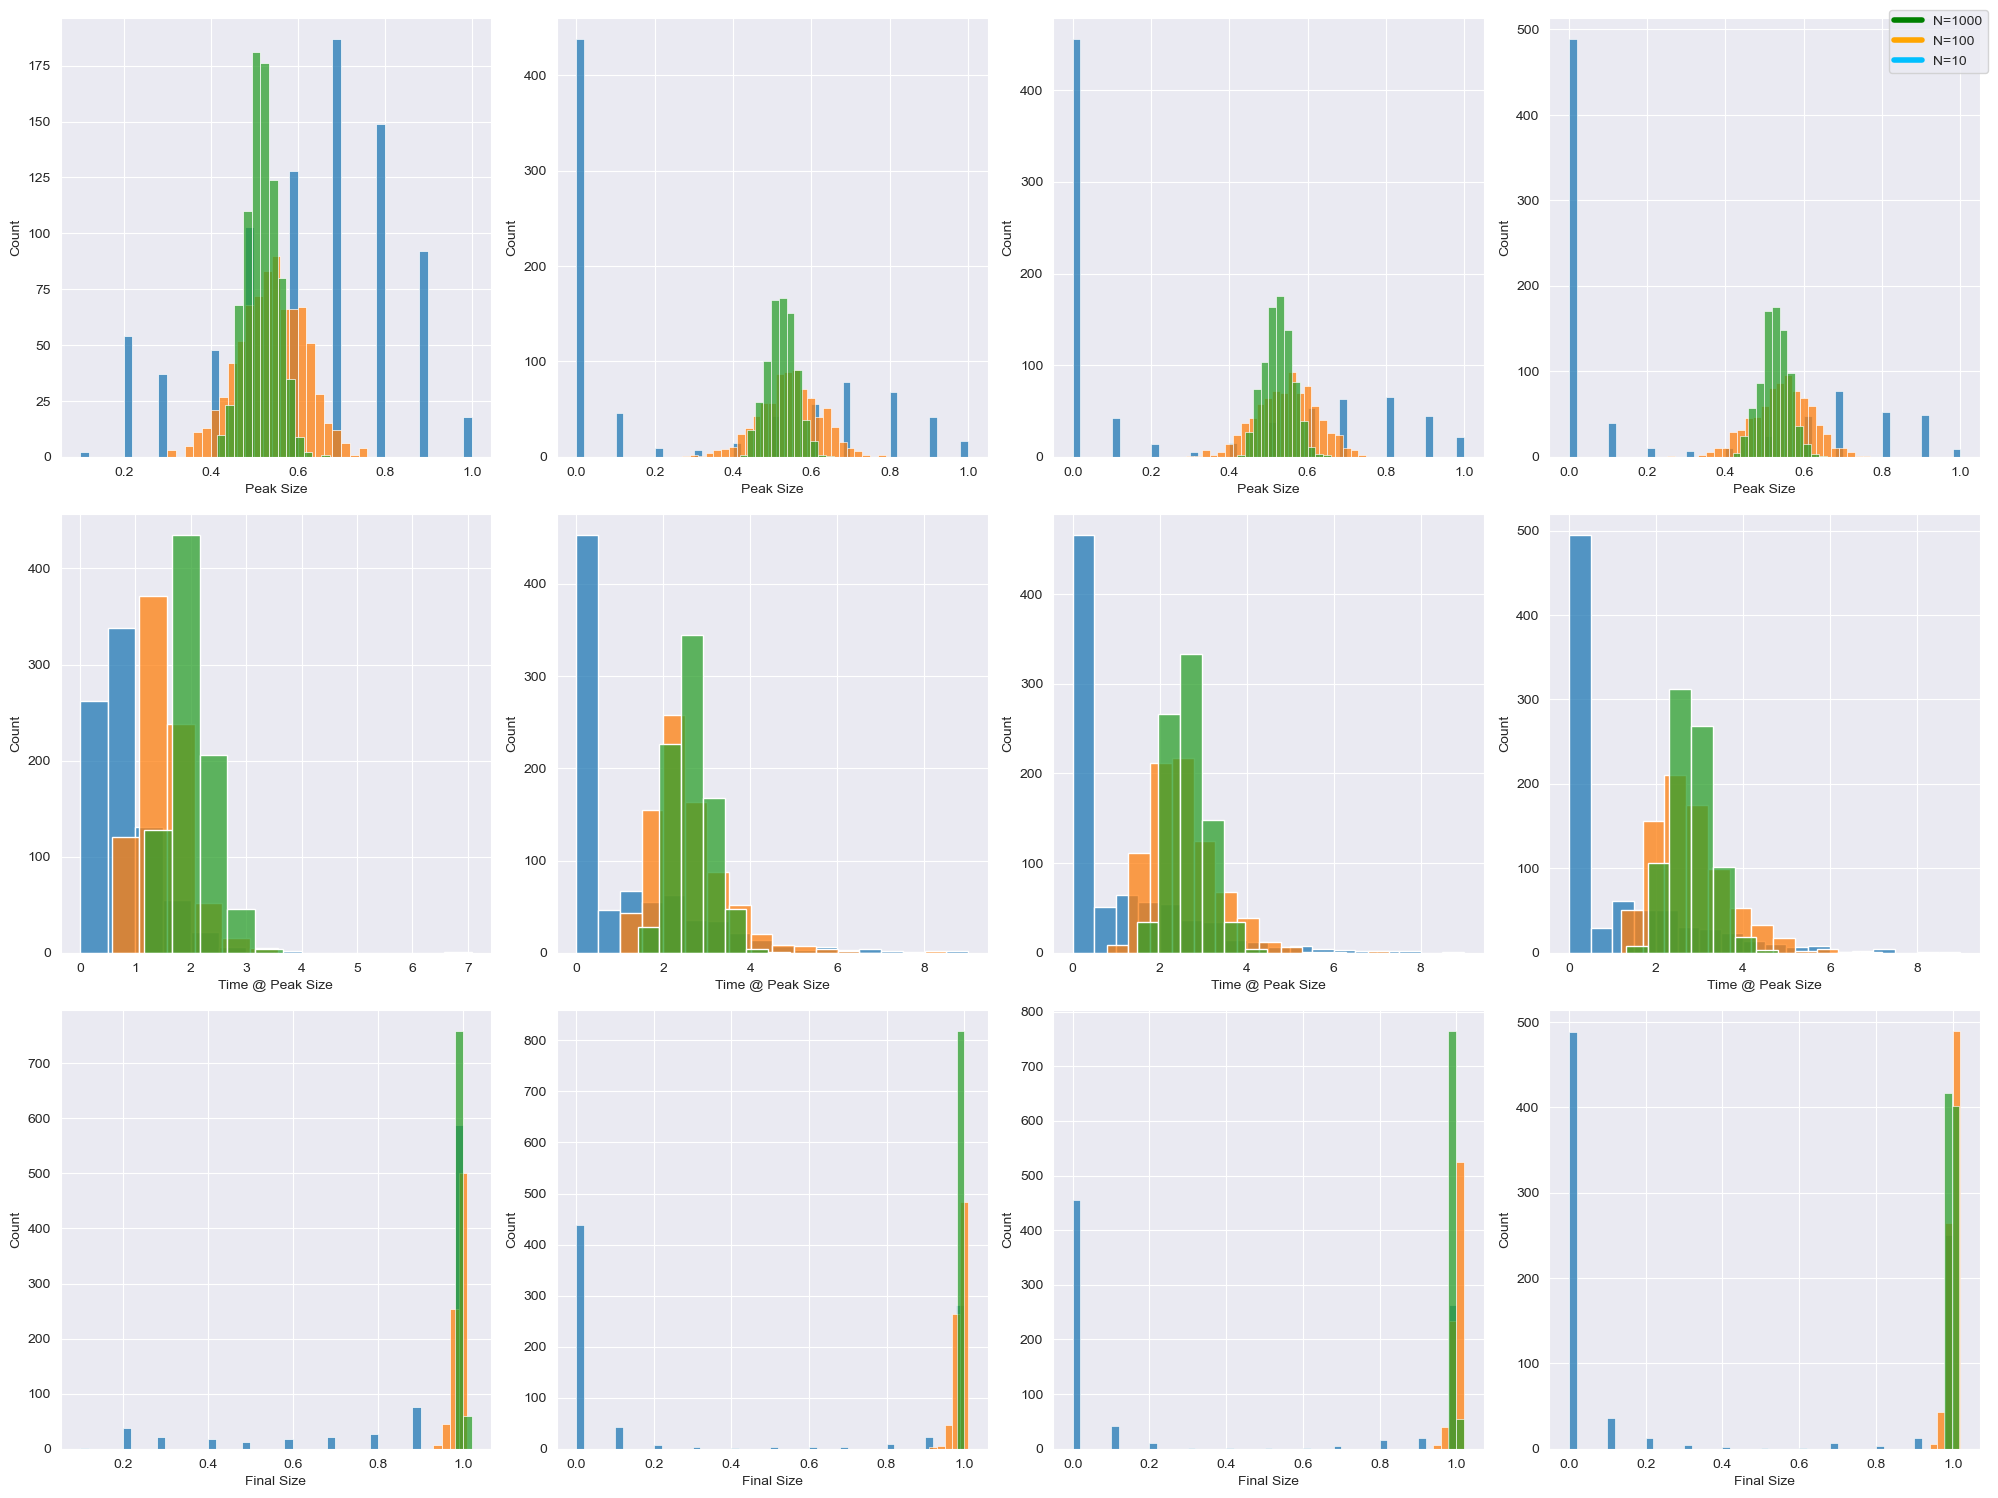

In [40]:
if Typ == "meta":
    fig,ax0 = plt.subplots(figsize = (20,15), nrows = 3, ncols = 4)
    for i in siz:
        for j in range(0,4):
            sns.histplot(np.array(plot_dict[f"Size_{i}"]["Peak"][f"Node{j+1}"])[np.array(plot_dict[f"Size_{i}"]["Extinction"]) == 0]/int(i), ax=ax0[0,j],binwidth = 0.02)
            sns.histplot(np.array(plot_dict[f"Size_{i}"]["Tpeak"][f"Node{j+1}"])[np.array(plot_dict[f"Size_{i}"]["Extinction"]) == 0], ax=ax0[1,j],binwidth = 0.5)
            sns.histplot(np.array(plot_dict[f"Size_{i}"]["Final_size"][f"Node{j+1}"])[np.array(plot_dict[f"Size_{i}"]["Extinction"]) == 0]/int(i), ax=ax0[2,j],binwidth = 0.02)
            ax0[0,j].set_xlabel("Peak Size")
            ax0[1,j].set_xlabel("Time @ Peak Size")
            ax0[2,j].set_xlabel("Final Size")
    fig.tight_layout()
    legend_elements = [Line2D([0], [0], color='g', lw=4, label='N=1000'),
                   Line2D([0], [0], color='orange',lw=4, label='N=100'),
                       Line2D([0], [0], color='deepskyblue', lw=4, label='N=10')]
    fig.legend(handles=legend_elements, bbox_to_anchor = (1,1))
    fig.tight_layout()
    fig.show()